In [145]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np

In [146]:
(train_images, train_labels) , (test_images,test_labels) = datasets.cifar10.load_data()

In [147]:
# normalization , converting into gray scale like in the format of RGB 
train_images, test_images = train_images/ 255.0 , test_images / 255.0 

In [148]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

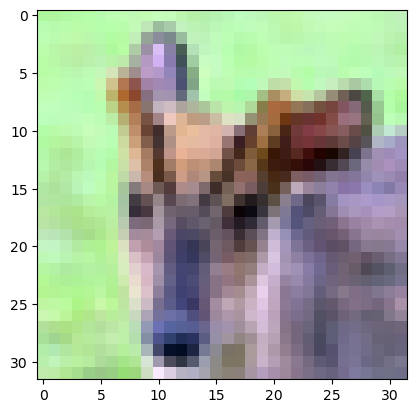

In [149]:
plt.imshow(train_images[3001])

In [150]:
class_names[train_labels[25][0]]

'frog'

In [151]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (32,32,3))) # 32 numberof (3,3) filters 
model.add(layers.MaxPooling2D((2,2))) # maxPooling is getting the maxvalues 
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))

C:\Users\arika\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [152]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
# adding neural network layers 

model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation = 'relu')) # 64 nodes for hidden layer
model.add(layers.Dense(10, activation = 'sigmoid')) # 10 for 10 differnt outputs

In [154]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [155]:
model.compile(
    optimizer = 'adam',  # optimizer is the one that adjusts or fine-tunes the output based on the weights that provided " Adam " is one of the optimzer
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [156]:
history = model.fit(train_images, train_labels, validation_split = 0.1, epochs = 10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 74s 49ms/step - accuracy: 0.3553 - loss: 1.7455 - val_accuracy: 0.5608 - val_loss: 1.2082
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.5794 - loss: 1.1813 - val_accuracy: 0.6466 - val_loss: 1.0213
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 47ms/step - accuracy: 0.6492 - loss: 0.9990 - val_accuracy: 0.6740 - val_loss: 0.9361
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 76s 54ms/step - accuracy: 0.6902 - loss: 0.8882 - val_accuracy: 0.6868 - val_loss: 0.9013
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 68s 48ms/step - accuracy: 0.7198 - loss: 0.8007 - val_accuracy: 0.7052 - val_loss: 0.8557
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 74s 52ms/step - accuracy: 0.7452 - loss: 0.7283 - val_accuracy: 0.7038 - val_loss: 0.8503
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 44ms/step - accuracy: 0.7614 - loss: 0.6786 - val_accuracy: 0.7136 - val_loss: 0.8459
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 64s 46ms/step - accuracy: 0.7761 -

In [157]:
Y_pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [158]:
y_pred1 = np.argmax(Y_pred,axis=1)
y_pred1


array([3, 8, 0, ..., 5, 4, 7], dtype=int64)

In [159]:
# from sklearn.metrics import accuracy_score

# accuracy_score(test_images,y_pred1)

# plt.imshow(test_images[25])

y_pred1[2004]

7

In [160]:
test_labels[2004]

array([7], dtype=uint8)

In [161]:
from sklearn.metrics import accuracy_score

test_labels_flat = test_labels.flatten()
acc = accuracy_score(test_labels_flat, y_pred1)

acc

0.6946

TypeError: Invalid shape () for image data

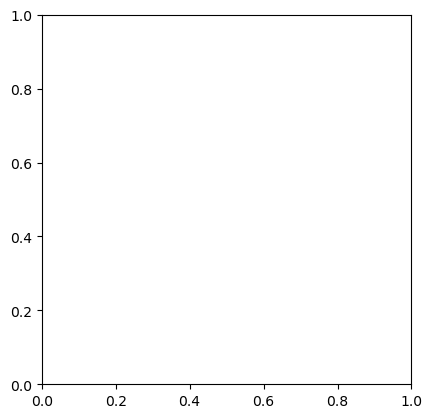

In [162]:
plt.imshow(y_pred1[2004], cmap = 'gray')
plt.title(f"Y_test: {test_labels[2004]} , y_pred : {y_pred1[2004]}")